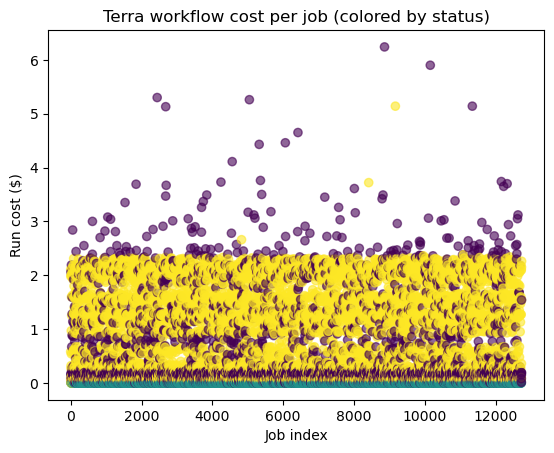

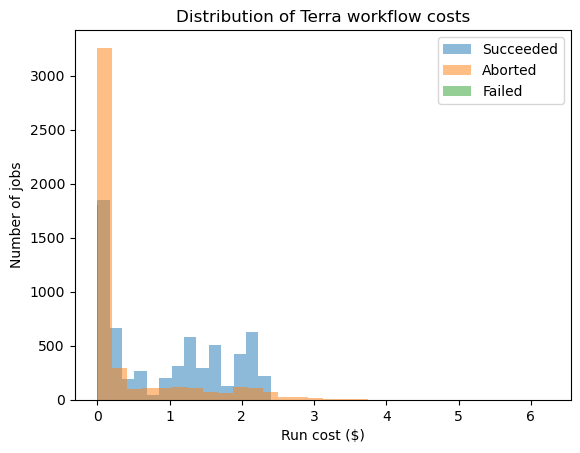

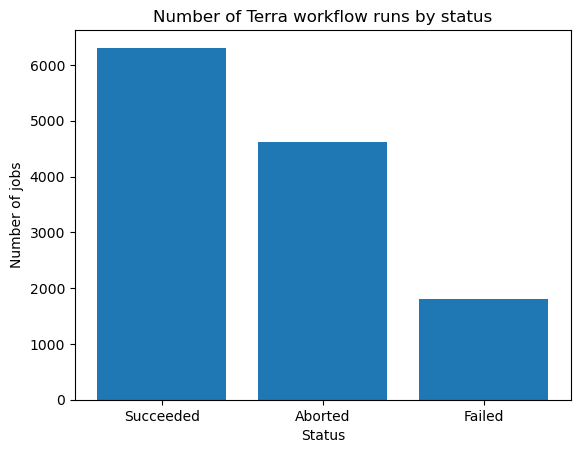

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load TSV
df = pd.read_csv("terra_job.tsv", sep="\t")

# Clean cost column
df["cost"] = pd.to_numeric(df["cost"], errors="coerce")

# Drop rows with missing cost
df = df.dropna(subset=["cost"])

# Normalize status labels
df["status"] = df["status"].str.capitalize()

# Assign a job index (one row = one job)
df["job_index"] = np.arange(len(df))

############################
# 1. Scatter: cost per job
############################
plt.figure()
plt.scatter(
    df["job_index"],
    df["cost"],
    c=df["status"].astype("category").cat.codes,
    alpha=0.6
)
plt.xlabel("Job index")
plt.ylabel("Run cost ($)")
plt.title("Terra workflow cost per job (colored by status)")
plt.show()

######################################
# 2. Histogram: cost distribution
######################################
plt.figure()
for status in df["status"].unique():
    subset = df[df["status"] == status]
    plt.hist(subset["cost"], bins=30, alpha=0.5, label=status)

plt.xlabel("Run cost ($)")
plt.ylabel("Number of jobs")
plt.title("Distribution of Terra workflow costs")
plt.legend()
plt.show()

######################################
# 3. Bar plot: number of jobs by status
######################################
counts = df["status"].value_counts()

plt.figure()
plt.bar(counts.index, counts.values)
plt.xlabel("Status")
plt.ylabel("Number of jobs")
plt.title("Number of Terra workflow runs by status")
plt.show()


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load TSV
df = pd.read_csv("terra_job.tsv", sep="\t")

In [ ]:
print(df.iloc[:10])  # Print the first few rows to understand the structure
print(df.columns)  # Print column names to identify relevant ones

# print(df['asText'].unique())  # Check unique status values

                             workflowId  cost   costType  \
0  ccf7d7c2-a02e-420c-bf75-c7bf1a400c7e  0.58  Estimated   
1  6b57f44f-3ea4-40a1-afc7-40204059cb9a  2.11  Estimated   
2  ccf05bbe-8922-4ea2-bcc5-93fa2d7ce28b  0.10  Estimated   
3  59693923-53ca-4607-a98b-4a3850c33c3f  0.07  Estimated   
4  45e2c376-e8d8-4877-8e1a-b0517e500818  1.98  Estimated   
5  4519a025-c4cd-4719-b841-400c37b512c8  0.16  Estimated   
6  8c8adef6-a4ad-45c9-9578-c6af79c15bb1  2.06  Estimated   
7  6f6aceea-2198-429b-8d85-c5286c7ac13b  0.27  Estimated   
8  c518056d-1ad4-4fee-95bf-a683d6db04b0  0.00  Estimated   
9  9b5e0209-82e4-42ea-96ad-213bbc11efaa  0.32  Estimated   

                                    inputResolutions messages     status  \
0  [{"inputName":"SubSetWorkflow.ID","value":"NWD...       []  Succeeded   
1  [{"inputName":"SubSetWorkflow.ID","value":"NWD...       []  Succeeded   
2  [{"inputName":"SubSetWorkflow.ID","value":"NWD...       []  Succeeded   
3  [{"inputName":"SubSetWorkflow.ID